In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Preprocessing :

In [3]:
df.drop(columns=['Id'],inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
df.shape

(150, 5)

In [8]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.duplicated().sum()

3

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

## EDA :

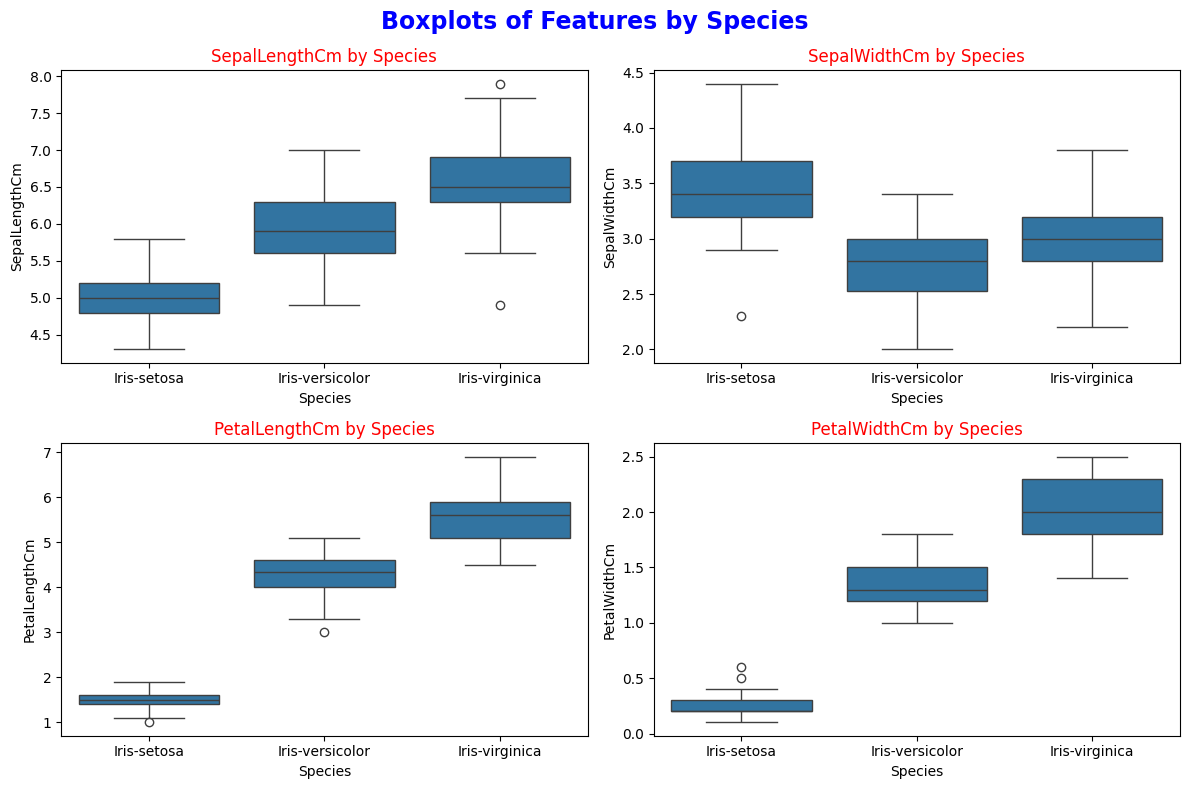

In [12]:
plt.figure(figsize=(12, 8))
plt.suptitle('Boxplots of Features by Species', fontweight='bold', fontsize=17,color='Blue')
# Get all numeric columns except Species
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create subplots for each feature
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, x='Species', y=col)
    plt.title(f'{col} by Species',color='Red')

plt.tight_layout()
plt.show()

## Model Building :

In [13]:
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [14]:
df.sample(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,5.8,4.0,1.2,0.2,0
47,4.6,3.2,1.4,0.2,0
90,5.5,2.6,4.4,1.2,1


In [15]:
encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
df = df[['SepalLengthCm','PetalLengthCm','Species']]
df.sample(5)

,SepalLengthCm,PetalLengthCm,Species
27,5.2,1.5,0
44,5.1,1.9,0
71,6.1,4.0,1
98,5.1,3.0,1
103,6.3,5.6,2


In [17]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [18]:
X

,SepalLengthCm,PetalLengthCm
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


In [19]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
X_train.shape , X_test.shape

((117, 2), (30, 2))

In [20]:
clf = LogisticRegression(multi_class='multinomial')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [21]:
print("\nClassification report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))


Classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.82      0.90      0.86        10
 Iris-virginica       0.88      0.78      0.82         9

       accuracy                           0.90        30
      macro avg       0.90      0.89      0.89        30
   weighted avg       0.90      0.90      0.90        30



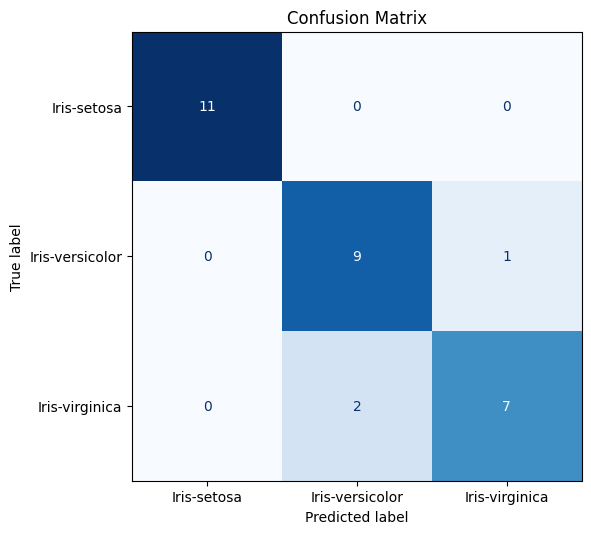

In [22]:
cm = confusion_matrix(y_test, y_pred)
fig_cm, ax_cm = plt.subplots(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.classes_)
disp.plot(ax=ax_cm, cmap=plt.cm.Blues, colorbar=False)  # colorbar optional
ax_cm.set_title("Confusion Matrix")
plt.tight_layout()
plt.show()

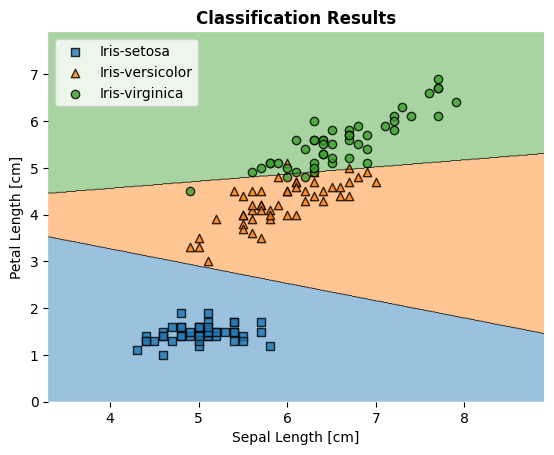

In [24]:
plot_decision_regions(X.values, y.values, clf, legend=2)

plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.title('Classification Results',fontweight='bold')
plt.legend(labels=encoder.classes_, loc='upper left')
plt.show()